In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math

K = 4.55e-4

meritve = [
    {
        'h': 0.034,
        't': sum([17.36, 18.29, 17.2])/3
    },
    {
        'h': 0.029,
        't': sum([20.13, 19.69, 20.31])/3
    },
    {
        'h': 0.020,
        't': sum([22.71, 22.18, 22.25])/3
    },
    {
        'h': 0.009,
        't': sum([38.64, 38.23, 38.01])/3
    },
    {
        'h': 0.003,
        't': sum([75.96, 76.36, 76.25])/3
    }
]

relative_t_error = [0.5/i['t'] for i in meritve]
relative_h_error = [0.0005/i['h']/2 for i in meritve]

rezultati = []
for i in meritve:
    # delta h, merjen, izracunano
    rezultati.append([
        i['h'],
        1e-3/i['t'],
        K*i['h']**0.5,
    ])

print("delta h", "\timerjeno", "\tizracunano", sep='\t')
for i in range(len(rezultati)):
    e = rezultati[i]
    print(
        '{0:.3f}'.format(e[0]), 
        '\t{0:.4f}'.format(e[1]*1e5)+'e-5 (1+-' + out.format(relative_t_error[i]) + ')',
        '{0:.4f}'.format(e[2]*1e5)+'e-5 (1+-' + out.format(relative_h_error[i]) + ')'
        , sep='\t')

delta h		imerjeno		izracunano
0.034		5.6764e-5 (1+-0.0284)	8.3898e-5 (1+-0.0074)
0.029		4.9892e-5 (1+-0.0249)	7.7484e-5 (1+-0.0086)
0.020		4.4683e-5 (1+-0.0223)	6.4347e-5 (1+-0.0125)
0.009		2.6114e-5 (1+-0.0131)	4.3165e-5 (1+-0.0278)
0.003		1.3125e-5 (1+-0.0066)	2.4921e-5 (1+-0.0833)


k premice: 4830334.50066
K izracunan iz naklona premice 0.000455
n premice: 3.64254171848e-18 (gre res skoraj skozi izhodisce)


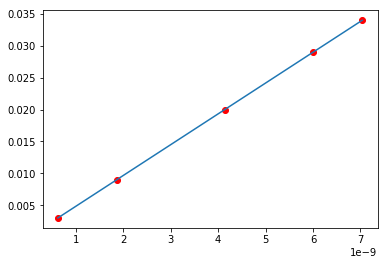

In [39]:
x = [i[2]**2 for i in rezultati]
y = [i['h'] for i in meritve]
plt.plot(x, y, 'ro')

A = np.vstack([x, np.ones(len(x))]).T
k, n = np.linalg.lstsq(A, y)[0]
yfit = [k * xi + n for xi in x]
plt.plot(x, yfit)

K_iz_naklona = (1/k)**0.5
print('k premice:', k)
print('K izracunan iz naklona premice', K_iz_naklona)
print('n premice:', n, '(gre res skoraj skozi izhodisce)')